In [ ]:
import matplotlib.pyplot as plt # plotting library
import numpy as np # this module is useful to work with numerical arrays
import pandas as pd 
import random 
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset,DataLoader,random_split
from torch.utils.data.sampler import SubsetRandomSampler
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import math
import glob

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/module')

from data_tool import *

In [ ]:
files = glob.glob("/content/drive/MyDrive/AI_FYP/*1h.csv")

In [ ]:
x,y,y_raw,last_index_for_coin = get_data(files,7)
train_loader,val_loader,test_loader = get_loader(1024,x,y)

Total: 51425
P: 27572
Z: 0
N: 23853
Total: 5690
P: 2791
Z: 0
N: 2899
Total: 5700
P: 2659
Z: 0
N: 3041


In [ ]:
class Conv(nn.Module):
  def __init__(self, in_channels, out_channels, kernel_size, stride, padding):
    super().__init__()
    self.conv = nn.Conv1d(in_channels,out_channels,kernel_size=kernel_size,stride=stride,padding=padding)
    self.norm = nn.BatchNorm1d(out_channels)
    self.act = nn.LeakyReLU(True)
  
  def forward(self,x):
    y = self.conv(x)
    y = self.norm(y)
    y = self.act(y)
    return y

class line(nn.Module):
  def __init__(self,in_lay,out_lay):
    super().__init__()
    self.lin = nn.Linear(in_lay,out_lay)
    self.norm = nn.BatchNorm1d(out_lay)
    self.act = nn.LeakyReLU(True)
  
  def forward(self,x):
    y = self.lin(x)
    y = self.norm(y)
    y = self.act(y)
    return y

class Classifier(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.model = nn.Sequential(
            Conv(50,32,7,1,0),
            Conv(32,8,7,1,0),
        )
        self.flat = nn.Flatten()

        self.linear = nn.Sequential(
            line(1248,640),
            line(640,320),
            line(320,64),
            line(64,3),
        )

    def forward(self,x):
      x = self.model(x)
      x = self.flat(x)
      x = self.linear(x)
      # print(x.shape)
      return x

In [ ]:
epochs = 50
lr = 1e-6
use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")

model = Classifier().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [ ]:
_ = training(2,model,criterion,optimizer,device,train_loader,val_loader)

[1/2] Loss: 0.0014181115526450624
[1/2] Val Loss: 1.1016398866971333
[1/2] Val Accuracy: 31.833333333333332
[2/2] Loss: 0.0010860104391629335
[2/2] Val Loss: 1.0894743998845418
[2/2] Val Accuracy: 46.0
[2/2] Loss: 0.0010860104391629335


In [ ]:
_ = training(2,model,criterion,optimizer,device,train_loader,val_loader)

[1/2] Loss: 0.0010725709843763056
[1/2] Val Loss: 1.0784003535906475
[1/2] Val Accuracy: 48.333333333333336
[2/2] Loss: 0.001060314477504198
[2/2] Val Loss: 1.0682428479194641
[2/2] Val Accuracy: 48.666666666666664
[2/2] Loss: 0.001060314477504198


In [ ]:
testing(model,criterion,optimizer,device,test_loader)

Test Loss: 1.0771679480870564
Test Accuracy: 44.5


In [ ]:
all_signal,signal_return,b_h_return,all_acc=test_profit(files,x,y,y_raw,last_index_for_coin,model,device,1024)

Total: 1140
P: 550
Z: 0
N: 590
Total: 1140
P: 574
Z: 0
N: 566
Total: 1140
P: 475
Z: 0
N: 665
Total: 1140
P: 561
Z: 0
N: 579
Total: 1140
P: 499
Z: 0
N: 641


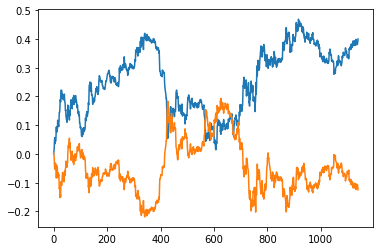

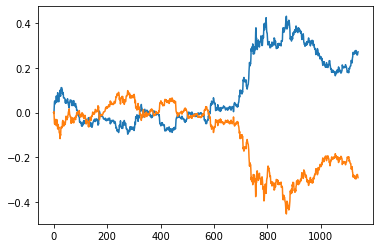

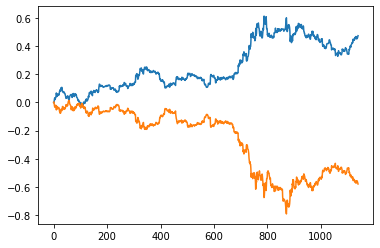

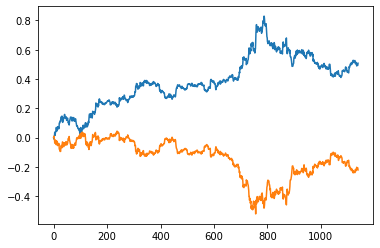

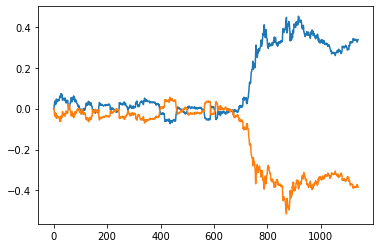

In [ ]:
for i in range(len(signal_return)):
  count = np.arange(len(signal_return[i]))
  plt.plot(count,np.cumsum(signal_return[i]))
  plt.plot(count,np.cumsum(b_h_return[i]))
  plt.show()